In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Logistic Regression on Titanic Dataset
Predict survival on the Titanic

___

<img src='../titanic.png' /></a>

We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often it's a first step in machine learning!

Also, you can download from [drive](https://drive.google.com/file/d/1dGd9lQ6rCJn766FXfAtm28wjAqORp9Yo/view?usp=sharing)

---
## Problem Statement
The classification problem being addressed: **predicting whether a passenger survived or not.**

Here we would want to use Logistic Regression in Python for classification.


---

## Import Libraries
Let's import some libraries to get started!

In [ ]:
# import libraries

import numpy as np    # matrix multiplication
import pandas as pd    # dataframe manipulation


In [ ]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns     # visualization

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fiverr_projects/Yong/train.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data['Survived'].unique()

array([0, 1])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Exploratory Data Analysis
---
Let's begin some exploratory data analysis!

 EDA involves exploring the dataset to gain insights into its structure, distributions, and relationships between variables.

---
We'll start by plotting some graphs!

<Axes: xlabel='Survived', ylabel='count'>

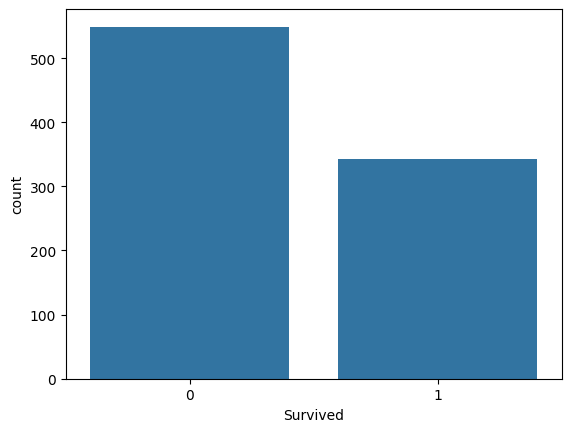

In [ ]:
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

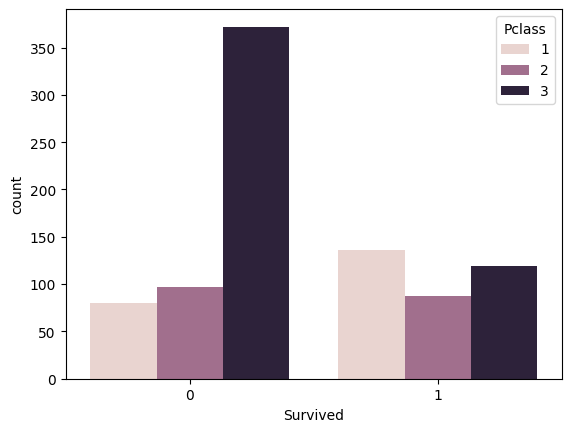

In [ ]:
sns.countplot(x='Survived', hue='Pclass',  data=data)

#### groupby with pandas
---
**Groupby** allows you to group together rows based off of a column and performs an aggregate function on them.
**aggregate function:** a function that takes in many values and then outputs a single value e.g.
`min()`

* Grouping data using pandas allows for aggregation based on specified columns.
* This is useful for summarizing data and performing operations on grouped subsets.

In [ ]:
data_new = data.copy()

In [ ]:
# data = data_new

In [ ]:
data.groupby('Pclass')

In [ ]:
data.groupby('Pclass').sum()['Fare']

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

In [ ]:
# data.groupby('Pclass').mean()['Fare']

In [ ]:
data.groupby('Pclass')

<Axes: xlabel='Survived', ylabel='count'>

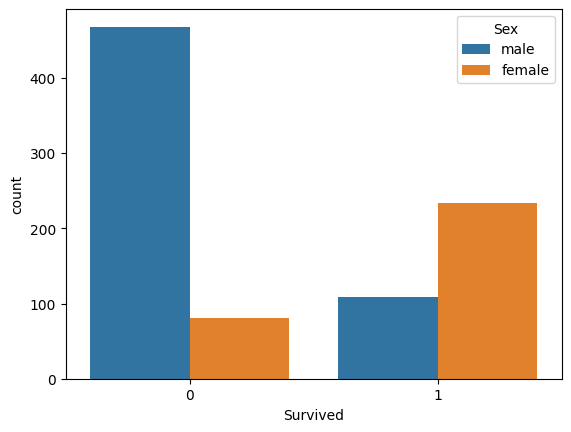

In [ ]:
sns.countplot(x='Survived', hue='Sex',  data=data)

<Axes: xlabel='Survived', ylabel='count'>

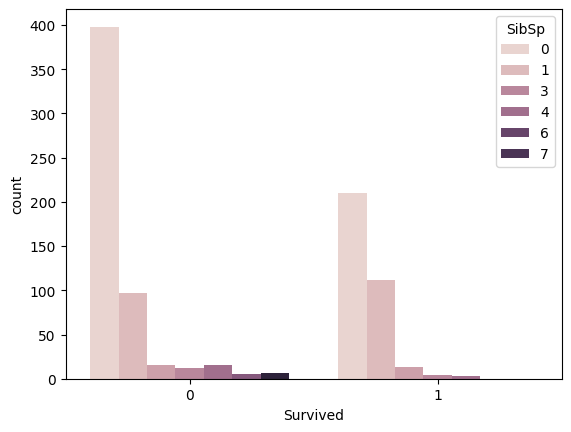

In [ ]:
sns.countplot(x='Survived', hue='SibSp',  data=data)

<Axes: xlabel='Survived', ylabel='count'>

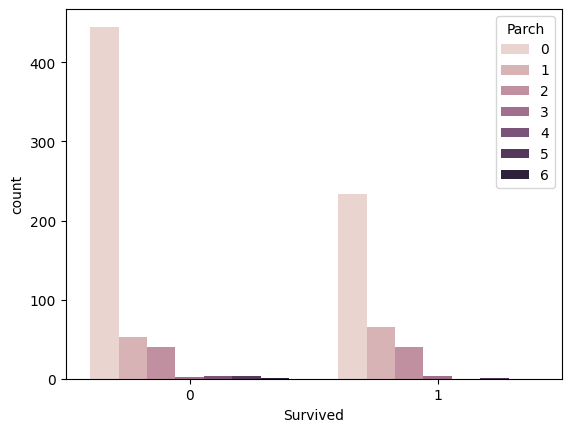

In [ ]:
sns.countplot(x='Survived', hue='Parch',  data=data)

<ipython-input-26-ec135ce2bd5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

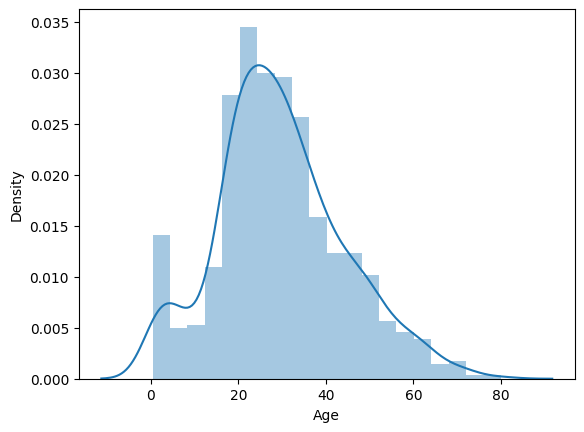

In [ ]:
sns.distplot(data['Age'])

<Axes: xlabel='Survived', ylabel='Age'>

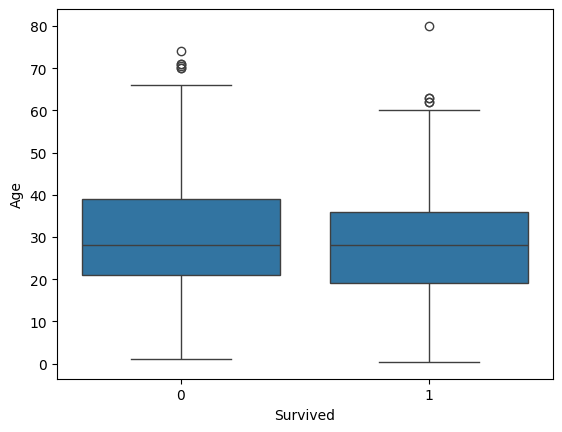

In [ ]:
sns.boxplot(x='Survived', y='Age', data=data)

<Axes: xlabel='Pclass', ylabel='Age'>

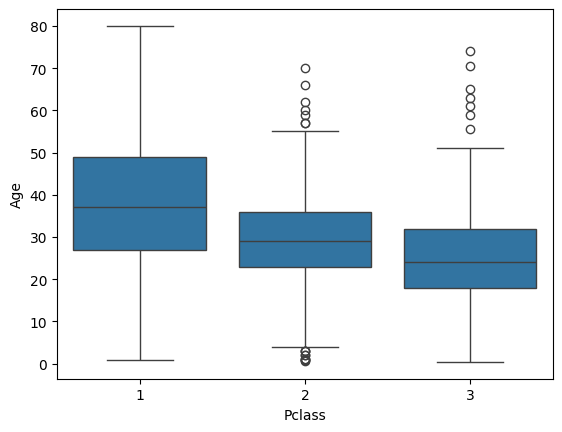

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=data)

<Axes: xlabel='Sex', ylabel='Age'>

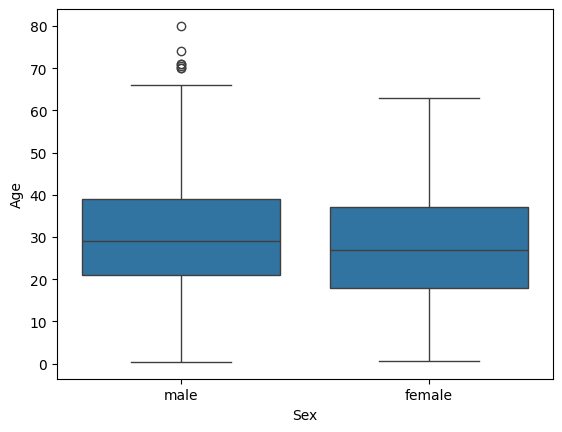

In [ ]:
sns.boxplot(x='Sex', y='Age', data=data)

#### Filling missing values
---
Here, you handle missing values in the dataset. Techniques for handling missing data include filling missing values with **mean, median, mode, or using more sophisticated imputation** techniques.

In [ ]:
data['Age'].mean()

29.69911764705882

In [ ]:
data.fillna(data['Age'].mean())

data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# data.groupby('Pclass').mean()['Age']

##### Imputation
---
Missing values in the dataset are addressed using techniques such as **imputation**, where missing values are replaced with estimated values based on the available data.

In [ ]:
def imputation_col(col):
  Age = col[0]
  pclass = col[1]


  if pd.isnull(Age):
    if pclass == 1:
      return 38
    elif pclass == 2:
      return 29
    elif pclass == 3:
      return 25
  else:
    return Age

# lambda_func = lambda x: x.apply(imputation_col, axis=1)

In [ ]:
data[data.columns[1]]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
data['Age'] = data[['Age', 'Pclass']].apply(imputation_col, axis=1)

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# data.groupby('Pclass').mean()['Age']

In [ ]:
# data.isna().sum()
# data.iloc[data[(data.isnull().sum(axis=1) >= 2)].index]
# data.iloc[data[data.isnull().any(axis=1)]]

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# import label encoder
from sklearn import preprocessing

l_encoder = preprocessing.LabelEncoder()

data['val_Embarked'] = l_encoder.fit_transform(data['Embarked'])

In [ ]:
data["val_Embarked"].isna().sum(),  data["val_Embarked"].unique()

(0, array([2, 0, 1]))

In [ ]:
data["Embarked"].isnull().sum()

0

### Model Training
---
This section involves preparing the data for modeling, training the logistic regression model, and evaluating its performance.

#### split data to features and labels
---
The dataset is divided into **input features** (independent variables) and the **target variable** (Survived) to facilitate model training.

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,val_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2


In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'val_Embarked'],
      dtype='object')

In [ ]:
X = 'Age, Pclass, Fare, val_Embarked'.split(",")

In [ ]:
X = data[['Age', 'Pclass', 'Fare', 'val_Embarked']]

In [ ]:
y = data['Survived']      #label


#### train_test_split

---
The dataset is further divided into **training** and **testing sets** to assess the model's performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:

X_train.shape,  y_train.shape, y_test.shape, X_test.shape

((711, 4), (711,), (178,), (178, 4))

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:

l_model = LogisticRegression()

In [ ]:

l_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:

pred = l_model.predict(X_test)

In [ ]:
pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

In [ ]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64

In [ ]:
pred_values = pd.DataFrame(y_test)
pred_values['predicted_values']  = pred

In [ ]:
pred_values.head(30)

,Survived,predicted_values
281,0,0
435,1,1
39,1,0
418,0,0
585,1,1
804,1,0
343,0,0
836,0,0
581,1,1
537,1,1


#### Evaluation Metrics on classification model
---
Various evaluation metrics, such as **accuracy, precision, recall, and F1-score,** are calculated to assess the performance of the logistic regression model in predicting survival.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# mean_squared_error(y_test, pred)

print(confusion_matrix(y_test, pred))

print('\n')

print(classification_report(y_test, pred))




[[92 17]
 [32 37]]


              precision    recall  f1-score   support

           0       0.74      0.84      0.79       109
           1       0.69      0.54      0.60        69

    accuracy                           0.72       178
   macro avg       0.71      0.69      0.70       178
weighted avg       0.72      0.72      0.72       178



### Model Saving
---
Once the model is trained and evaluated, it can be saved for future use or deployment in other applications.

In [ ]:
import joblib

# Save the model to a file
model_filename = 'logistic_regression_model.pkl'
joblib.dump(l_model, model_filename)
print(f"Model saved as {model_filename}")


Model saved as logistic_regression_model.pkl


In [ ]:
# Load the model from the file
loaded_model = joblib.load(model_filename)


In [ ]:
# predict using loaded model

loaded_model_predictions = loaded_model.predict(X_test)

In [ ]:
loaded_model_predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

In [ ]:
# pick index 1 of the dataframe
X.iloc[1]

Age             38.0000
Pclass           1.0000
Fare            71.2833
val_Embarked     0.0000
Name: 1, dtype: float64

In [ ]:
# np.array(X.iloc[1])

In [ ]:
# predict index 1
loaded_model.predict(np.array(X.iloc[1]).reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])